### Importación de datos



In [12]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


#1. Análisis de facturación



In [13]:
# Unir los datos de las 4 tiendas
import pandas as pd

datos_tiendas = pd.concat([tienda, tienda2, tienda3, tienda4])

# Crear una nueva columna "Precio total" sumando el precio y el costo de envío
datos_tiendas['Precio total'] = datos_tiendas['Precio'] + datos_tiendas['Costo de envío']

# Calcular la facturación total (suma de todos los precios totales)
facturacion_total = datos_tiendas['Precio total'].sum()

# Mostrar la facturación total
print(f"La facturación total de todas las tiendas es: ${facturacion_total:,.2f}")

La facturación total de todas las tiendas es: $4,638,316,200.00


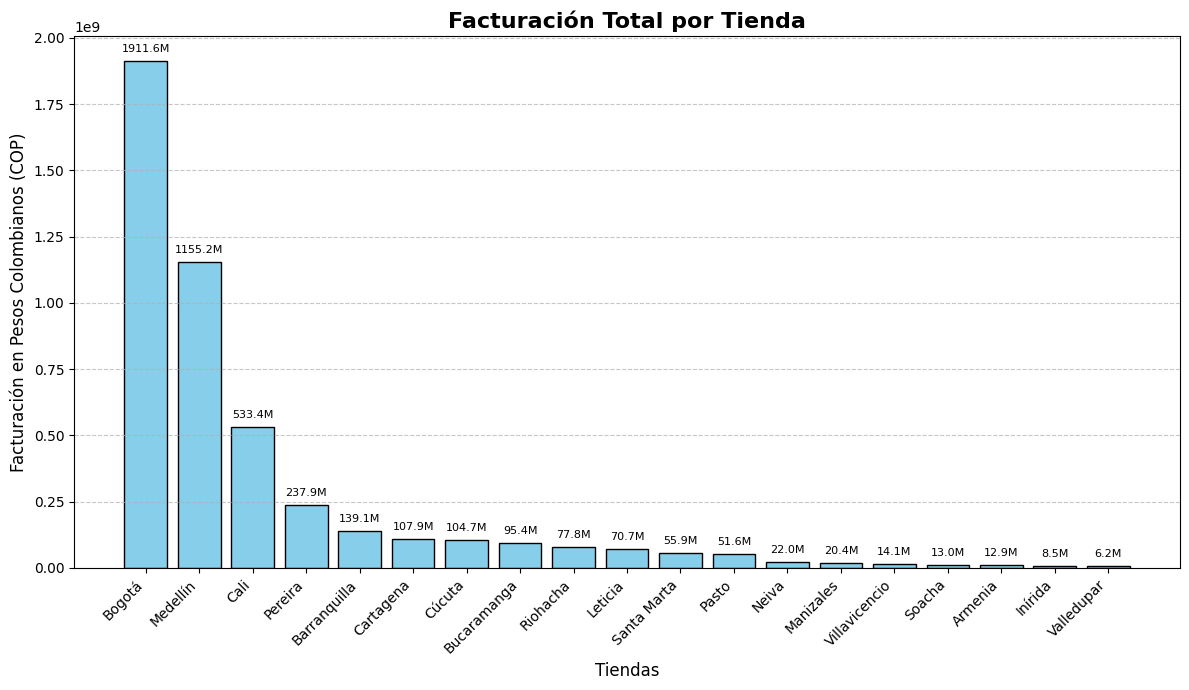

In [14]:
import matplotlib.pyplot as plt

# Agrupar facturación por tienda
facturacion_por_tienda = datos_tiendas.groupby('Lugar de Compra')['Precio total'].sum().sort_values(ascending=False)

# Crear un gráfico de barras mejorado
fig, ax = plt.subplots(figsize=(12,7))

# Dibujar el gráfico
bars = ax.bar(facturacion_por_tienda.index, facturacion_por_tienda.values, color='skyblue', edgecolor='black')

# Títulos y etiquetas claras
plt.title('Facturación Total por Tienda', fontsize=16, fontweight='bold')
plt.ylabel('Facturación en Pesos Colombianos (COP)', fontsize=12)
plt.xlabel('Tiendas', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Añadir los valores encima de cada barra
for bar in bars:
    height = bar.get_height()
    ax.annotate(f'{height/1e6:.1f}M',  # Mostrar en millones
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 5),  # 5 puntos arriba
                textcoords="offset points",
                ha='center', va='bottom', fontsize=8, color='black')

# Ajustar margen para que no se corte nada
plt.tight_layout()

# Mostrar
plt.show()



# 2. Ventas por categoría

In [16]:
# Agrupar por categoría (conteo de productos)
ventas_categoria = df_total['Categoría del Producto'].value_counts()

# Mostrar el resultado
print("Ventas por Categoría:")
print(ventas_categoria)


Ventas por Categoría:
Categoría del Producto
Muebles                    1886
Electrónicos               1772
Juguetes                   1290
Electrodomésticos          1149
Deportes y diversión       1113
Instrumentos musicales      753
Libros                      742
Artículos para el hogar     730
Name: count, dtype: int64


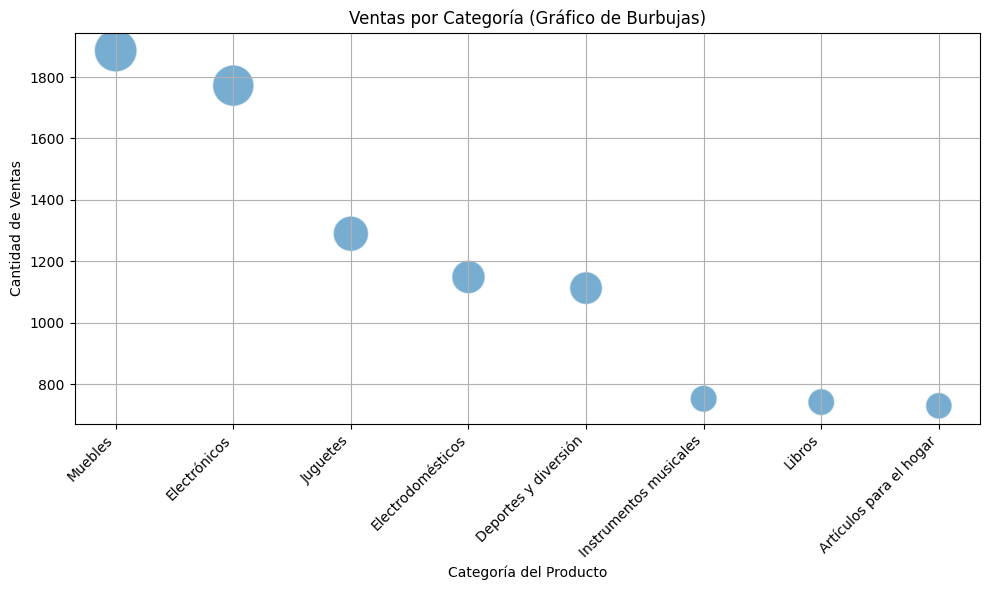

In [17]:
import matplotlib.pyplot as plt

# Convertimos el resultado a DataFrame para graficar
df_burbujas = ventas_categoria.reset_index()
df_burbujas.columns = ['Categoría', 'Cantidad']

# Crear gráfico de burbujas
plt.figure(figsize=(10, 6))
plt.scatter(df_burbujas['Categoría'], df_burbujas['Cantidad'],
            s=df_burbujas['Cantidad'] * 0.5,  # tamaño de la burbuja proporcional a la cantidad
            alpha=0.6, edgecolors='w')

# Mejorar presentación
plt.xticks(rotation=45, ha='right')
plt.title('Ventas por Categoría (Gráfico de Burbujas)')
plt.xlabel('Categoría del Producto')
plt.ylabel('Cantidad de Ventas')
plt.grid(True)
plt.tight_layout()
plt.show()


# 3. Calificación promedio de la tienda


In [ ]:
# Calcular la calificación promedio por tienda (lugar de compra)
calificacion_promedio = datos_tiendas.groupby('Lugar de Compra')['Calificación'].mean().sort_values(ascending=False)

# Mostrar resultados
print(calificacion_promedio)


Lugar de Compra
Pasto            4.148936
Bogotá           4.113619
Valledupar       4.071429
Cali             4.046673
Cartagena        4.020661
Pereira          4.013540
Bucaramanga      3.977901
Cúcuta           3.940860
Medellín         3.926534
Leticia          3.922535
Riohacha         3.895706
Soacha           3.894737
Villavicencio    3.827586
Barranquilla     3.803226
Neiva            3.800000
Inírida          3.642857
Manizales        3.634146
Santa Marta      3.596026
Armenia          3.464286
Name: Calificación, dtype: float64


<ipython-input-18-2362de61b632>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=datos_tiendas, x='Lugar de Compra', y='Calificación', palette="Pastel1")


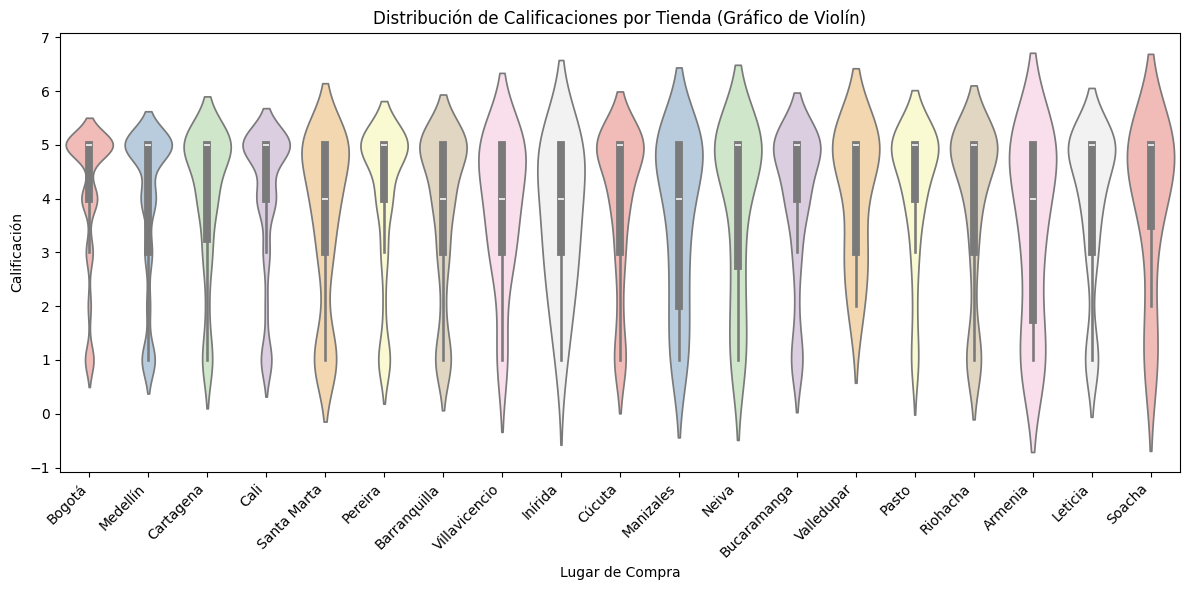

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

# Gráfico de violín (requiere todos los datos, no solo el promedio)
plt.figure(figsize=(12, 6))
sns.violinplot(data=datos_tiendas, x='Lugar de Compra', y='Calificación', palette="Pastel1")
plt.xticks(rotation=45, ha='right')
plt.title('Distribución de Calificaciones por Tienda (Gráfico de Violín)')
plt.xlabel('Lugar de Compra')
plt.ylabel('Calificación')
plt.tight_layout()
plt.show()


# 4. Productos más y menos vendidos

In [ ]:
# Contar cuántas veces se vendió cada producto
ventas_productos = datos_tiendas['Producto'].value_counts()

# Producto más vendido
producto_mas_vendido = ventas_productos.idxmax()
cantidad_mas_vendido = ventas_productos.max()

# Producto menos vendido
producto_menos_vendido = ventas_productos.idxmin()
cantidad_menos_vendido = ventas_productos.min()

# Mostrar resultados
print(f"🔝 Producto más vendido: {producto_mas_vendido} (vendido {cantidad_mas_vendido} veces)")
print(f"🔻 Producto menos vendido: {producto_menos_vendido} (vendido {cantidad_menos_vendido} veces)")


🔝 Producto más vendido: Mesa de noche (vendido 210 veces)
🔻 Producto menos vendido: Celular ABXY (vendido 157 veces)


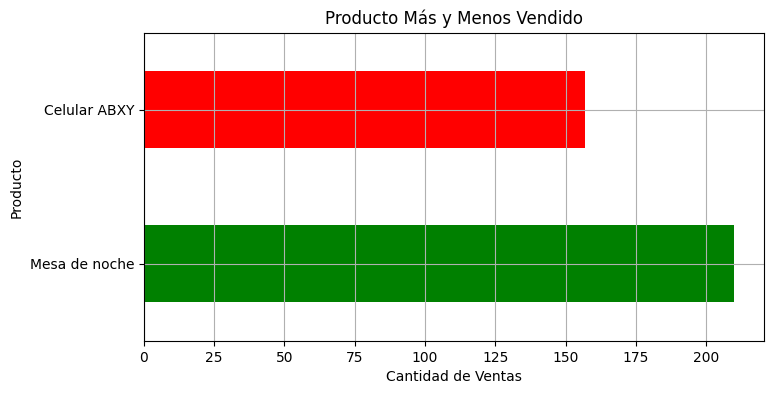

In [ ]:
import matplotlib.pyplot as plt

# Crear un nuevo DataFrame solo con el más y el menos vendido
productos_extremos = pd.Series({
    producto_mas_vendido: cantidad_mas_vendido,
    producto_menos_vendido: cantidad_menos_vendido
})

# Crear gráfico
productos_extremos.plot(kind='barh', figsize=(8,4), color=['green', 'red'])
plt.title('Producto Más y Menos Vendido')
plt.xlabel('Cantidad de Ventas')
plt.ylabel('Producto')
plt.grid(True)
plt.show()



# 5. Envío promedio por tienda

In [ ]:
# Calcular el costo de envío promedio por tienda
envio_promedio = datos_tiendas.groupby('Lugar de Compra')['Costo de envío'].mean().sort_values(ascending=False)

# Mostrar resultados
print(envio_promedio)


Lugar de Compra
Soacha           34768.421053
Inírida          30557.142857
Cúcuta           28597.311828
Pasto            27801.063830
Neiva            27710.000000
Bucaramanga      26790.055249
Cali             26726.812314
Leticia          25317.605634
Medellín         25282.022472
Villavicencio    25100.000000
Manizales        24948.780488
Bogotá           24532.082171
Riohacha         24127.607362
Pereira          23211.411992
Armenia          22867.857143
Barranquilla     22692.258065
Cartagena        22638.429752
Valledupar       22021.428571
Santa Marta      18752.317881
Name: Costo de envío, dtype: float64


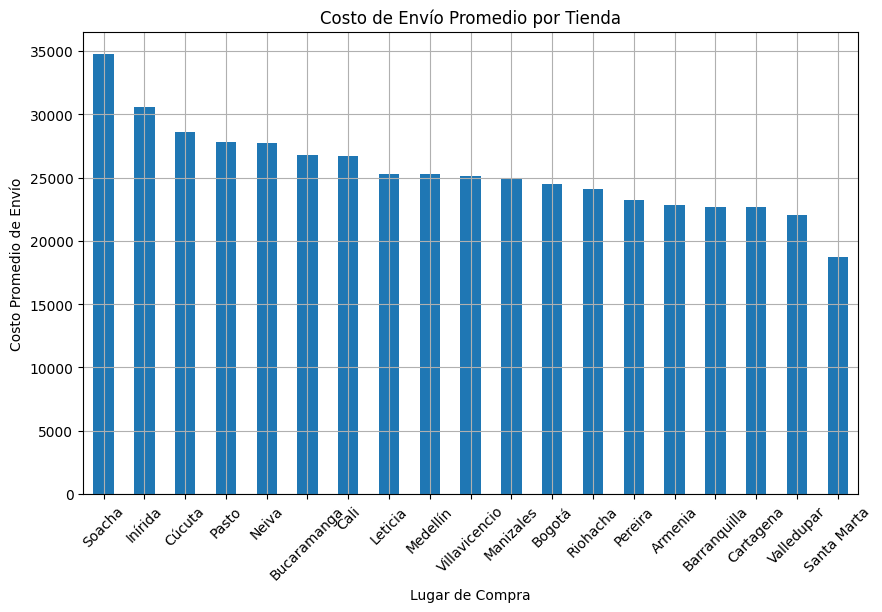

In [ ]:
import matplotlib.pyplot as plt

# Crear gráfico de barras
envio_promedio.plot(kind='bar', figsize=(10,6))
plt.title('Costo de Envío Promedio por Tienda')
plt.ylabel('Costo Promedio de Envío')
plt.xlabel('Lugar de Compra')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()
